adapted from https://towardsdatascience.com/a-beginners-guide-to-convolutional-neural-networks-cnns-14649dbddce8
## What is a Convolution?
A convolution is how the input is modified by a filter. In convolutional networks, multiple filters are taken to slice through the image and map them one by one and learn different portions of an input image. Imagine a small filter sliding left to right across the image from top to bottom and that moving filter is looking for, say, a dark edge. Each time a match is found, it is mapped out onto an output image.

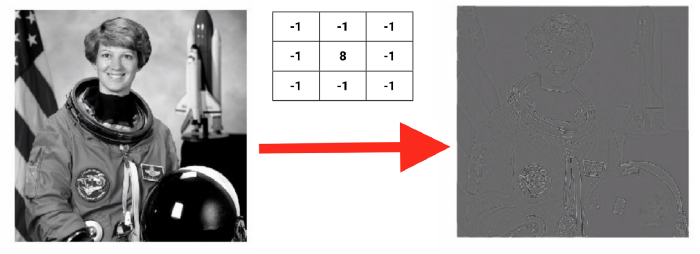
> https://www.cs.columbia.edu/education/courses/course/COMSW4995-7/26050/

For example, there is a picture of Eileen Collins and the matrix above the red arrow is used as a convolution to detect dark edges. As a result, we see an image where only dark edges are emphasized.

Note that an image is 2 dimensional with width and height. If the image is colored, it is considered to have one more dimension for RGB color. For that reason, 2D convolutions are usually used for black and white images, while 3D convolutions are used for colored images.

## Convolution in 2D
Let’s start with a (4 x 4) input image with no padding and we use a (3 x 3) convolution filter to get an output image.

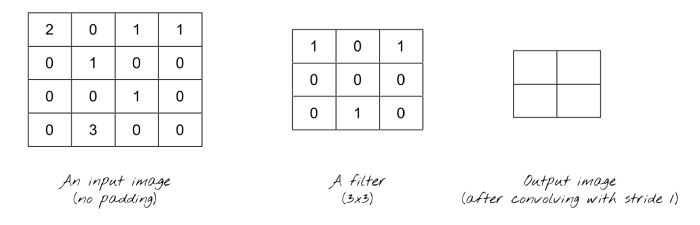!

The first step is to multiply the yellow region in the input image with a filter. Each element is multiplied with an element in the corresponding location. Then you sum all the results, which is one output value.

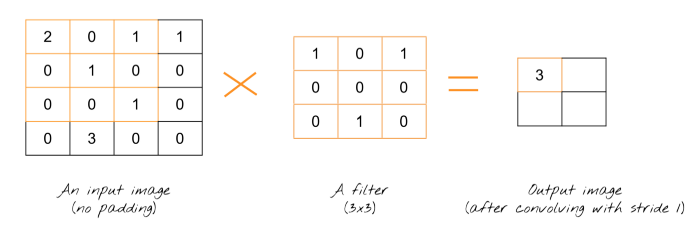

Mathematically, it’s (2 * 1) + (0 * 0) + (1 * 1) + (0 * 0) + (1 * 0) + (0 * 0) + (0 * 0) + (0 * 1) + (1 * 0) = 3

Then, you repeat the same step by moving the filter by one column. And you get the second output.

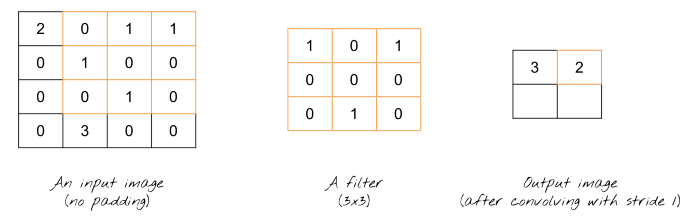

Notice that you moved the filter by only one column. The step size as the filter slides across the image is called a stride. Here, the stride is 1. The same operation is repeated to get the third output. A stride size greater than 1 will always downsize the image. If the size is 1, the size of the image will stay the same.

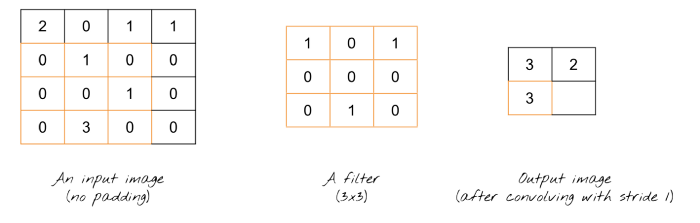

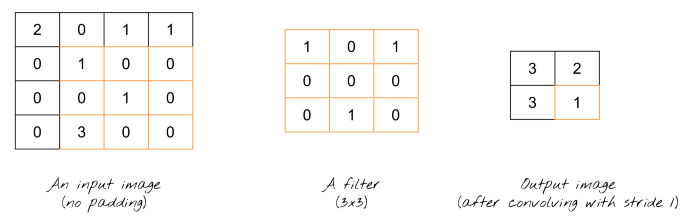

We see that the size of the output image is smaller than that of the input image. In fact, this is true in most cases.

## Convolution in 3D

Convolution in 3D is just like 2D, except you are doing the 2d work 3 times, because there are 3 color channels.

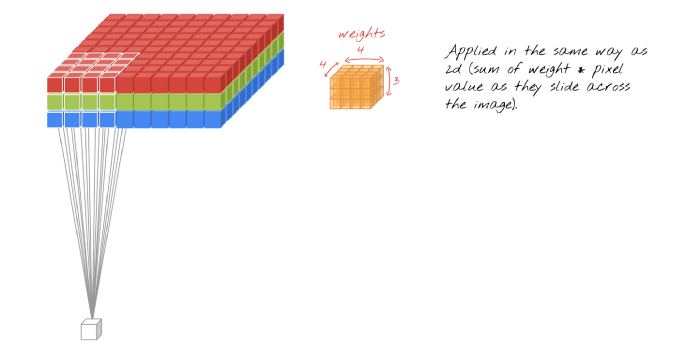
> https://twitter.com/martin_gorner

Normally, the width of the output gets smaller, just like the size of the output in 2D case.

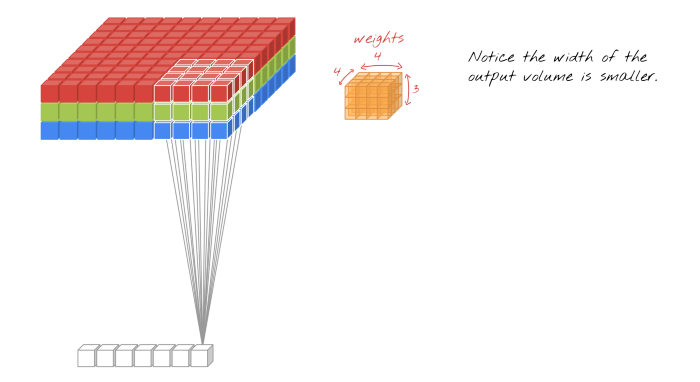
> https://twitter.com/martin_gorner

If you want to keep the output image at the same width and height without decreasing the filter size, you can add padding to the original image with zero’s and make a convolution slice through the image.

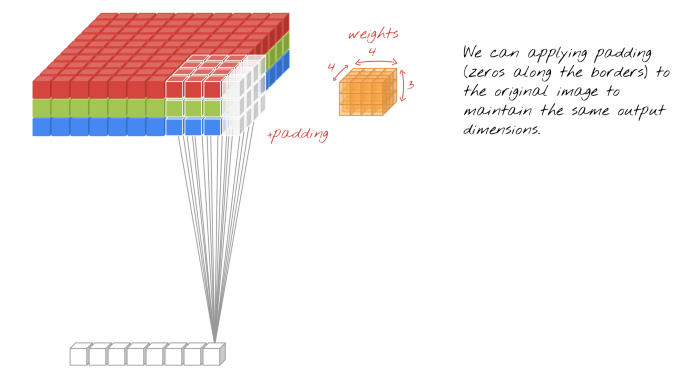
> https://twitter.com/martin_gorner

We can apply more padding!

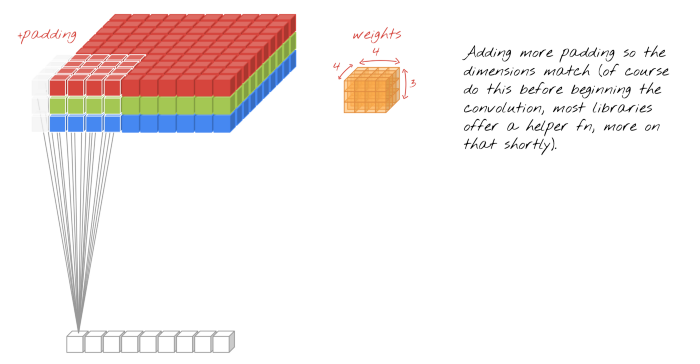
> https://twitter.com/martin_gorner

Once you’re done, this is what the result would look like:

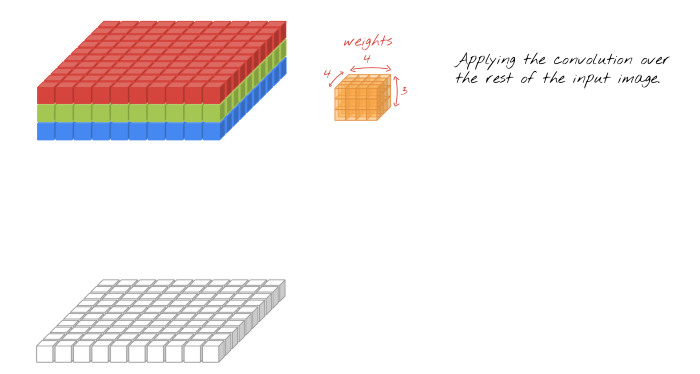
> https://twitter.com/martin_gorner

As you add more filters, it increases the depth of the output image. If you have the depth of 4 for the output image, 4 filters were used. Each layer corresponds to one filter and learns one set of weights. It does not change between steps as it slides across the image.

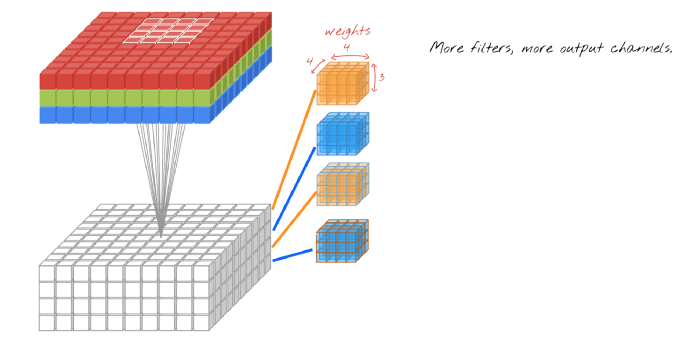
> https://twitter.com/martin_gorner

An output channel of the convolutions is called a **feature map**. It encodes the presence or absence, and degree of presence of the feature it detects. Notice that unlike the 2D filters from before, each filter connects to every input channel. (question? what does it mean by each filter connects to every input channel unlike 2D?) This means they can compute sophisticates features. Initially, by looking at R, G, B channels, but after, by looking at combinations of learned features such as various edges, shapes, textures and semantic features.

## Translation-Invariant
Another interesting fact is CNNs are somewhat resistant to translation such as an image shifting a bit, which would have a similar activation map as the one before shifting. It’s because the convolution is a feature detector and if it’s detecting a dark edge and the image is moved to the bottom, then dark edges will not be detected until the convolution is moved down.

## Special Case — 1D Convolution
1D convolution is covered here, because it’s usually under-explained, but it has noteworthy benefits.

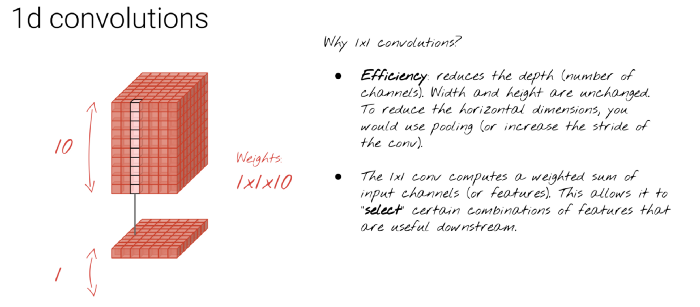
> https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd

They are used to reduce the depth (number of channels). Width and height are unchanged in this case. If you want to reduce the horizontal dimensions, you would use pooling, increase the stride of the convolution, or don’t add paddings. The 1D convolutions computes a weighted sum of input channels or features, which allow selecting certain combinations of features that are useful downstream. 1D convolution compresses because there is only one It has a same effect of

## Pooling

Note that pooling is a separate step from convolution. Pooling is used to reduce the image size of width and height. Note that the depth is determined by the number of channels. As the name suggests, all it does is it picks the maximum value in a certain size of the window. Although it’s usually applied spatially to reduce the x, y dimensions of an image.

## Max-Pooling
Max pooling is used to reduce the image size by mapping the size of a given window into a single result by taking the maximum value of the elements in the window.

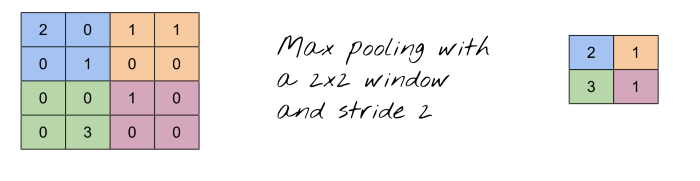
> http://cs231n.github.io/convolutional-networks/

## Average-Pooling
It’s same as max-pooling except that it averages the windows instead of picking the maximum value.

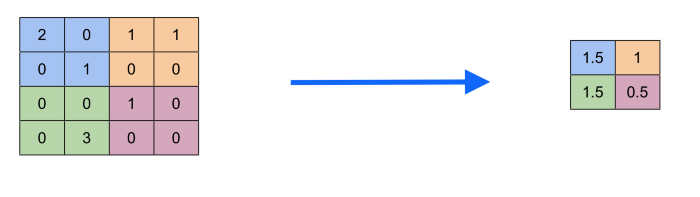
> http://cs231n.github.io/convolutional-networks/

## Common Set-up
In order to implement CNNs, most successful architecture uses one or more stacks of convolution + pool layers with relu activation, followed by a flatten layer then one or two dense layers.

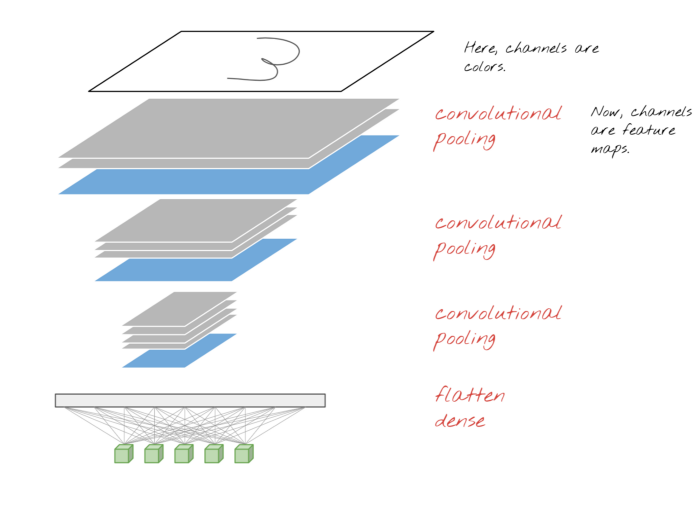

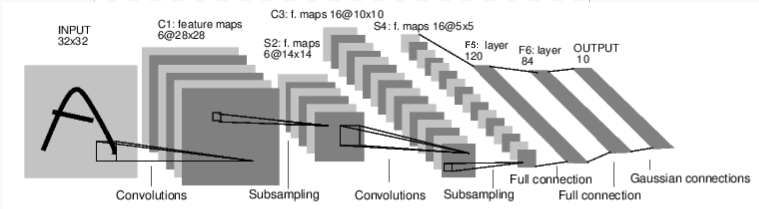

> LeNet is a convolutional neural network structure proposed by Yann LeCun et al. in **1998**. In general, LeNet refers to lenet-5 and is a simple convolutional neural network. Convolutional neural networks are a kind of feed-forward neural network whose artificial neurons can respond to a part of the surrounding cells in the coverage range and perform well in large-scale image processing. [Wikipedia](https://en.wikipedia.org/wiki/LeNet)

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output.

As we move through the network, feature maps become smaller spatially, and increase in depth. Features become increasingly abstract and lose spatial information. For example, the network understands that the image contained an eye, but it is not sure where it was.

Here’s an example of a typical CNN network in PyTorch.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``


## Define the network

Let’s define this network:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Here’s the result when you do model summary. Let’s break those layers down and see how we get those parameter numbers.

In [2]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the ``forward`` function, and the ``backward`` function (where gradients are computed) is automatically defined for you using ``autograd``. You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``

In [3]:
params = list(net.parameters())
print(len(params))

10


### Layer 1
``(conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))``

Filter size (3 x 3) * input depth (1) * # of filters (6). Here, the input depth is 1, because it’s for MNIST black and white data. 

The learnable parameters of a model:


In [4]:
print(params[0].size())  # conv1's .weight input
print(params[1].size())  # conv1's .weight output

torch.Size([6, 1, 3, 3])
torch.Size([6])


### Layer 2
``F.max_pool2d(F.relu(self.conv1(x)), (2, 2))``

Pooling layers don’t have learnable parameters.

### Layer 3
``(conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))``

Filter size (3 x 3) * input depth (6) * # of filters (16). Here, the input depth is 6, because it’s based on previous layer output. 

The learnable parameters of a model:

In [5]:
print(params[2].size())  # conv2's .weight input
print(params[3].size())  # conv2's .weight output

torch.Size([16, 6, 3, 3])
torch.Size([16])


### Layer 4
``F.max_pool2d(F.relu(self.conv1(x)), (2, 2))``

Pooling layers don’t have learnable parameters.

### Layer 5
``x = x.view(-1, self.num_flat_features(x))``

It unstacks the volume above it into an array.

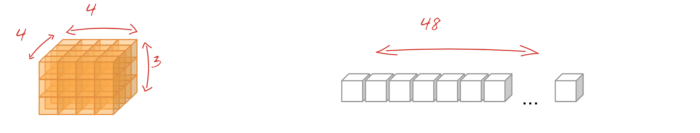

### Layer 6
``(fc1): Linear(in_features=576, out_features=120, bias=True)``

Input Dimension (576) * Output Dimension (120) + One bias per output neuron (120)

In [6]:
print(params[4].size())  # fc1's .weight input
print(params[5].size())  # fc1's .weight output

torch.Size([120, 576])
torch.Size([120])


### Layer 7
``(fc2): Linear(in_features=120, out_features=84, bias=True)``

Input Dimension (120) * Output Dimension (84) + One bias per output neuron (84)

In [7]:
print(params[6].size())  # fc1's .weight input
print(params[7].size())  # fc1's .weight output

torch.Size([84, 120])
torch.Size([84])


### Layer 8
``(fc3): Linear(in_features=84, out_features=10, bias=True)``

Input Dimension (84) * Output Dimension (10) + One bias per output neuron (84)

In [8]:
print(params[8].size())  # fc1's .weight input
print(params[9].size())  # fc1's .weight output

torch.Size([10, 84])
torch.Size([10])


## Working example
Let's try a random 32x32 input.
Note: expected input size of this net (LeNet) is 32x32. To use this net on
the MNIST dataset, please resize the images from the dataset to 32x32.

In [9]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0400, -0.0896,  0.0977,  0.0221,  0.0746,  0.0415,  0.0352, -0.1424,
          0.0262, -0.0233]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random
gradients:

In [10]:
net.zero_grad()
out.backward(torch.randn(1, 10))

<div class="alert alert-info"><h4>Note</h4><p>``torch.nn`` only supports mini-batches. The entire ``torch.nn``
    package only supports inputs that are a mini-batch of samples, and not
    a single sample.

    For example, ``nn.Conv2d`` will take in a 4D Tensor of
    ``nSamples x nChannels x Height x Width``.

    If you have a single sample, just use ``input.unsqueeze(0)`` to add
    a fake batch dimension.</p></div>

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network

Loss Function
-------------
A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
`loss functions <https://pytorch.org/docs/nn.html#loss-functions>`_ under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the input and the target.

For example:



In [11]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.5053, grad_fn=<MseLossBackward>)


Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the loss, and all Tensors in the graph that has ``requires_grad=True``
will have their ``.grad`` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [12]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

Backprop
--------
To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.



In [13]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0006,  0.0030, -0.0049, -0.0047, -0.0134, -0.0125])


Now, we have seen how to use loss functions.

**Read Later:**

  The neural network package contains various modules and loss functions
  that form the building blocks of deep neural networks. A full list with
  documentation is `here <https://pytorch.org/docs/nn>`_.

**The only thing left to learn is:**

  - Updating the weights of the network

Update the weights
------------------
The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

     ``weight = weight - learning_rate * gradient``

We can implement this using simple Python code:

.. code:: python

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, we built a small package: ``torch.optim`` that
implements all these methods. Using it is very simple:



In [14]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
print(net.conv1.bias.grad)
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update
print(net.conv1.bias.grad)

tensor([0., 0., 0., 0., 0., 0.])
tensor([ 0.0006,  0.0030, -0.0049, -0.0047, -0.0134, -0.0125])


.. Note::

      Observe how gradient buffers had to be manually set to zero using
      ``optimizer.zero_grad()``. This is because gradients are accumulated
      as explained in the `Backprop`_ section.